<a href="https://colab.research.google.com/github/ChickenRob0t/Homework-classes/blob/Dynamic-Systems-and-Chaos/T_4_Linearization/Tarea_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [ ]:
#Parte 1, función que regrese con q1 y p1 todo x_0
def x0(q_1,p_1,E):
  p_2=np.sqrt(2*m*E-m**2*w**2*q_1**2-p_1**2)
  return (q_1,0,p_1,p_2) 

In [ ]:
#Adicional, una función que dé valores posibles de E con una configuración inicial xd
def E_c(q_1,q_2,p_1,p_2):
  E=(p_1**2+p_2**2)/(2*m)+ m*w**2/2 * (q_1**2+q_2**2)+ alpha*q_1**2*q_2**2
  return E

In [ ]:
#Re-utilizamos la función 'giro' de la clase pasada cx, ciertas modificaciones
def giro_2(q_a,v_a,t_0,t_f,cut,alpha):
  x_0=np.append(q_a,v_a)
  zero_m=np.zeros((4,4))
  
  def RHS_2(x,t):
    w_m=[[-w**2, -2*alpha/m *x[0]*x[1]],[-2*alpha/m *x[0]*x[1], -w**2]]
    zero_m[2:,:2]=w_m
    zero_m[:2,2:]=np.eye(2,2)

    return np.matmul(zero_m,x)

  t=np.linspace(t_0,t_f,cut)
  return odeint(RHS_2,x_0,t)

In [ ]:
def cero(q1,q2,t1,t2):
  return (t2-t1)/(q1-q2) * q1 + t1
  #Entrega el valor de t cuando q=0 (interpolación lineal)

In [ ]:
def Poin(x):
  for i in range(1, len(x)):
    if (x[i-1,1] >= 0 and x[i,1] < 0 and x[i,3] > 0) or (x[i-1,1] < 0 and x[i,1] >= 0 and x[i,3]>0):
      return i

  return None

In [ ]:
def Poin_care(vec,s=True):  #Vector arreglo [q1,p1,t]
  q_i,p_i,t_a= vec[0],vec[1],vec[2]      
  t_f=t_a+5
  

  q_1,q_2,p_1,p_2 = x0(q_i,p_i,e_c)
  
  #else:
    #q_1=q_2=0
    #p_1=p_2=np.sqrt(m*e_c)
  
  dt=(t_f-t_a)/cut

  q_a=np.append(q_1,q_2)
  v_a=np.append(p_1/m,p_2/m)

  x_0=giro_2(q_a,v_a,t_a,t_f,cut,alpha) #Función de la tarea pasada
  
  
  a=Poin(x_0)                    
  
 

  q2_1,q2_2=x_0[a-1,1],x_0[a,1]       #Valores del tiempo y posiciones
  t_1, t_2= dt*(a-1) , dt*a           #Para sacar t cuando q2=0

  q1_1,q1_2=x_0[a-1,0],x_0[a,0]      #Valores de q1 y v1 en esos puntos
  v1_1,v1_2=x_0[a-1,2],x_0[a,2]



  
  t_00=cero(q2_1,q2_2,t_1,t_2)   #Interpolación lineal de t (usando los valores de q2)
  t_0=t_a+t_00
  

  #print(max(x_0[:,2]))

  q_0= (q1_2-q1_1)/(t_2-t_1) *t_00  + cero(t_1,t_2,q1_1,q1_2) #Interpolaciones lineales para encontrar 'b'
  v_0= (v1_2-v1_1)/(t_2-t_1) *t_00 + cero(t_1,t_2,v1_1,v1_2)

  #print(q1_1,q_0,q1_2)
  #print(v1_1,v_0,v1_2)
  #print(q2_1,q2_2,x_0[a+1,1])
  #print(t_1,t_00,t_2)
  #print(x_0[a,3])
  #print('----------------')
  

  return [q_0,v_0*m,t_0]


In [ ]:
#Condiciones iniciales
alpha=0.5
w=np.pi/2
m=5

cut=500
t0=0
t1=2

q_test=[40,30]
v_test=[8,-10]

e_c=E_c(q_test[0],q_test[1],v_test[0],v_test[1])
e_c

735437.6568767021

In [ ]:
Poin_points=[[25,420,0]]

for i in range(400):
  Poin_points.append(Poin_care(Poin_points[i]))


Poin_points=np.array(Poin_points)

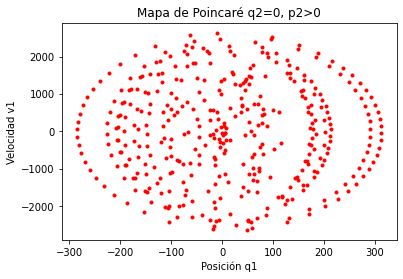

In [ ]:
plt.scatter(Poin_points[:400,0], Poin_points[:400,1],marker='.', c='r')
#plt.scatter(Poin_points[10:20,0], Poin_points[10:20,1],marker='.',c='r')
#plt.scatter(Poin_points[20:30,0], Poin_points[20:30,1],marker='.',c='k')
#plt.scatter(Poin_points[30:50,0], Poin_points[30:50,1],marker='.',c='b')
#plt.scatter(Poin_points[50:70,0], Poin_points[50:70,1],marker='.',c='k')
#plt.scatter(Poin_points[70:100,0], Poin_points[70:100,1],marker='.',c='y')
#plt.scatter(Poin_points[100:200,0], Poin_points[100:200,1],marker='.', c='r')
#plt.scatter(Poin_points[200:300,0], Poin_points[200:300,1],marker='.', c='r')
#plt.scatter(Poin_points[300:400,0], Poin_points[300:400,1],marker='.', c='b')

plt.xlabel('Posición q1')
plt.ylabel('Velocidad v1')
plt.title('Mapa de Poincaré q2=0, p2>0')
plt.savefig('Mapa_poin.png',dpi=200)

##**Aquí comienza la parte de la tarea 4**

In [ ]:
def extra_points(vec_2,a=True):
  a=[]
  for i in range(len(vec_2)):
    a.append(Poin_care(vec_2[i],a))
  return a

In [ ]:
#Esta es una manera de generar puntos alrededor
dp=0.1
dq=0.1
po_1=[np.array([0,350,0])]

dpq=np.array([dq,dp,0])
dqp=np.array([-dq,dp,0])

for i in range(1,10):
  po_1.append( po_1[i-1]+ i* dpq )
  po_1.append(po_1[i-1]- i* dpq )
  po_1.append(po_1[i-1]+i*dqp )
  po_1.append(po_1[i-1]-i*dqp )


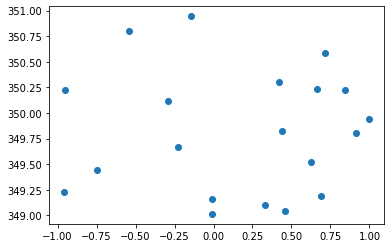

In [ ]:
#Esta es otra forma de generar los valores aleatorios, está un poquito más bonita cx

lis=[0.0, 350, 0]

def aleat(lis,num,bot,top):
  pp_1 = np.array([lis] * num, dtype='float64')
  dp = np.random.uniform(bot, top, num)
  dq = np.random.uniform(bot, top, num)
  
  pp_1[:, 0] += dp
  pp_1[:, 1] += dq

  return list(pp_1)

ps=np.array(aleat(lis,20,-1,1))
plt.scatter(ps[:,0],ps[:,1])

Aquí ya hacemos los puntos en el mapa de Poincaré

In [ ]:
#Para el primer punto en el origen
po_1=[0,0,0]
po_1=aleat(po_1,100,-0.5,0.5)

points_f=np.array(extra_points(po_1))

po_1=np.array(po_1)

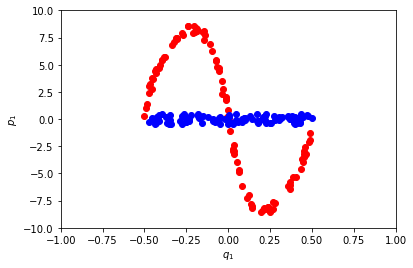

In [ ]:
plt.scatter(points_f[:,0],points_f[:,1],c='r')
plt.scatter(po_1[:,0],po_1[:,1], c='b')
plt.xlim(-1,1)
plt.ylim(-10,10)
plt.xlabel('$q_1$')
plt.ylabel('$p_1$')
plt.savefig('Perturbacion_1.png',dpi=200)

In [ ]:
#Para el segundo punto en q's y p's iguales
po_2=[0,np.sqrt(m*e_c),0]
po_2=aleat(po_2,100,-0.1,0.1)

points2_f=np.array(extra_points(po_2))
po_2=np.array(po_2)

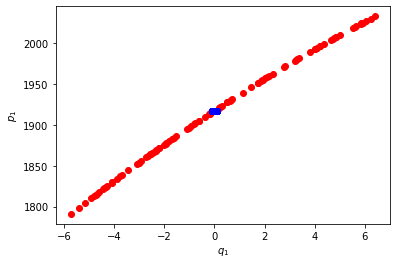

In [ ]:
plt.scatter(points2_f[:,0],points2_f[:,1],c='r')
plt.scatter(po_2[:,0],po_2[:,1], c='b')
#plt.xlim(-1,1)
#plt.ylim(-10,10)
plt.xlabel('$q_1$')
plt.ylabel('$p_1$')
plt.savefig('Perturbacion_2.png',dpi=200)

In [ ]:
#Nota para mí, al parecer el punto en el mapa de Poincaré de q_1=q_2 y p_1=p_2 es tan caótico que con la función que generamos no es suficiente
#Para que se converja a un punto a través de las iteraciones, esto podría ser por el cálculo con la regresión lineal que no sea muy exacto

*Linearización del mapeo para encontrar qué tipo de puntos son*

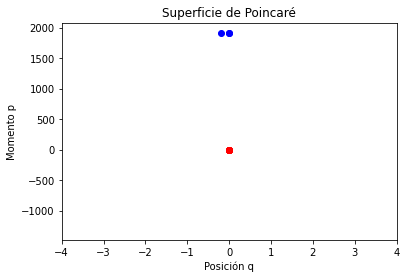

In [ ]:
#Primero nos aseguramos que funcione el mapeo
os_arm=[[0,0,0]]
q_p=[[0,np.sqrt(m*e_c),0]]

for i in range(6):
  os_arm.append(Poin_care(os_arm[i]))
  q_p.append(Poin_care(q_p[i]))

os_arm=np.array(os_arm)
q_p=np.array(q_p)

plt.scatter(os_arm[:,0],os_arm[:,1], c='r')
plt.scatter(q_p[:,0],q_p[:,1],c='b')
plt.xlabel('Posición q')
plt.ylabel('Momento p')
plt.xlim(-4,4)
plt.title('Superficie de Poincaré')
plt.savefig('Superficie_bien.png',dpi=200)
#Esto ya nos indica que está bien, prácticamente quedan en la misma posición los puntos

In [ ]:
os_arm
#Aquí la primera intersección debería ser en 4, ya que w=pi/2 y con T=2pi/w  nos deja T=4, esto nos entrega una diferencia de aproximadamente 8*10^-3

array([[ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  3.99200006],
       [ 0.        ,  0.        ,  7.98400012],
       [ 0.        ,  0.        , 11.97600018],
       [ 0.        ,  0.        , 15.96800024],
       [ 0.        ,  0.        , 19.9600003 ],
       [ 0.        ,  0.        , 23.95200035]])

In [ ]:
dp=0.01
dq=0.01
os_q=[0+dq,0,0]
os_p=[0,0+dp,0]

pq_p=[0,np.sqrt(m*e_c)+dp,0]
pq_q=[0+dq,np.sqrt(m*e_c),0]

h=0.01

#Para p=q
l1_pq=np.array(pq_q)[:2] -np.array(Poin_care(pq_q))[:2] / h

l2_pq=np.array(pq_p)[:2] -np.array(Poin_care(pq_p))[:2] / h 

#Para el oscilador
l1_os=np.array(os_q)[:2]-np.array(Poin_care(os_q))[:2] / h

l2_os=np.array(os_p)[:2] -np.array(Poin_care(os_p))[:2] / h 

In [ ]:
L1=np.column_stack((l1_os,l2_os))
L2=np.column_stack((l1_pq,l2_pq))

eigenvalues_1, eigenvectors_1 = np.linalg.eig(L1)
eigenvalues_2, eigenvectors_2 = np.linalg.eig(L2)

In [ ]:
eigenvalues_2
#eigenvectors_2

array([-5.66257830e+01, -1.89897804e+05])